<a href="https://colab.research.google.com/github/imugagga/Sales-Predictions---JFood-Sores/blob/main/Project_2_Mugagga_Innocent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset: Adult Data Set**

**Task**

*Prediction task is to determine whether a person makes over 50K in a year.*

1) Source of data
```
https://archive.ics.uci.edu/ml/datasets/Adult
```

***2) Brief description of data***
```

This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
aimed to determined whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

```
***3) What is the target?***
```
Annual salary of the Individuals
Prediction task is to determine whether a person makes over 50K in a year.
```

*4) Is this a classification or regression problem?*
```
Classification Problem 
```
5) How many features?
```
There are 14 Features.
```
6) How many rows of data.
```
Rows: 32561
```
7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
```
Missing Values
```


In [816]:
#Mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [817]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [818]:
#Read the file 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Supervised Machine Learning/Week 7/Uploads/adult.data',header=None)

df.columns=[ 'Age',	'Workclass',	'Final_Weight',	'Education','Education_Num',
            'Marital_Status',	'Occupation',	'Relationship',	'Race',	'Sex',	
            'Capital_Gain',	'Capital_Loss',	'Hours_Per_Week',	'Native_Country','Annual_Salary']
df.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Annual_Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Attribute Information:**

In [819]:
#Features
print(f'No. Features: {len(list(df.columns))-1}')

No. Features: 14


In [820]:
#Data Shape
df.shape

(32561, 15)

***Data Cleaning***

In [821]:
#Remove the whitespaces from the data.
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [822]:
#Check for Duplicates
df.duplicated().sum()

24

In [823]:
#Drop Duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [824]:
#Checking for data Inconsistences
df.nunique()

Age                  73
Workclass             9
Final_Weight      21648
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_Per_Week       94
Native_Country       42
Annual_Salary         2
dtype: int64

In [825]:
#Check Data types and Data shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Workclass       32537 non-null  object
 2   Final_Weight    32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education_Num   32537 non-null  int64 
 5   Marital_Status  32537 non-null  object
 6   Occupation      32537 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Sex             32537 non-null  object
 10  Capital_Gain    32537 non-null  int64 
 11  Capital_Loss    32537 non-null  int64 
 12  Hours_Per_Week  32537 non-null  int64 
 13  Native_Country  32537 non-null  object
 14  Annual_Salary   32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [826]:
#In the dataset the missing values are represented as ' ?', 
#Thus i will replace this with a Nan to have a better view of the column with the missing values
df.replace('?',np.nan,inplace=True)

#Identify and addressed missing values
df.isnull().sum()

Age                  0
Workclass         1836
Final_Weight         0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     582
Annual_Salary        0
dtype: int64

In [827]:
#Filter Columns with Missing Values
dfm = df[df.isnull().sum()[df.isnull().sum() > 0].index]

#Compare Minning Values with the length of the dataframe column
print('Column       Missing Values   Full Column_Length')
for col in dfm:
  print(f'{col}:       {df[col].isnull().sum()}         {len(df)}')

Column       Missing Values   Full Column_Length
Workclass:       1836         32537
Occupation:       1843         32537
Native_Country:       582         32537


In [828]:
#Compare Missing Values with the length of the dataframe column
for col in dfm:
  print(f'{col}: Missing Values are {(df[col].isnull().sum()/len(df)*100).round(2)}% of the Column Length')

Workclass: Missing Values are 5.64% of the Column Length
Occupation: Missing Values are 5.66% of the Column Length
Native_Country: Missing Values are 1.79% of the Column Length


***Imputing Missing values.***

The Missing values are a small percentage of the data, as indicated above.
Since these are also object data type columns.

Each of these columns with missing values will be imputed with the most common element in the column.

In [829]:
#Imputation
Mode_Workclass  = df['Workclass'].mode()[0]
df['Workclass'].fillna(Mode_Workclass,inplace=True)

Mode_Occupation  = df['Occupation'].mode()[0]
df['Occupation'].fillna(Mode_Occupation,inplace=True)

Mode_Native_Country  = df['Native_Country'].mode()[0]
df['Native_Country'].fillna(Mode_Native_Country,inplace=True)

In [830]:
#Check for data Consistences

df1 = df.select_dtypes(include='object')
for col in df1:
  print(f'{col}: {df[col].unique()} \n')

#All the data is consistent and no incosistences identified

Workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

Education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

Marital_Status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

Occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

Relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

Race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

Sex: ['Male' 'Female'] 

Native_Country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England'

In [831]:
df.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Annual_Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Exploratory data Analysis**

In [832]:
#Numerize the Target Column
salary_map = {'<=50K': 0, '>50K': 1}
df['Annual_Salary'] = df['Annual_Salary'].map(salary_map)

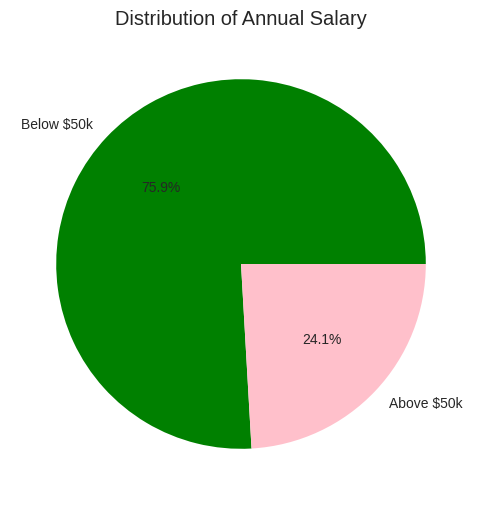

In [833]:
fig, ax = plt.subplots(figsize=(6, 6))
labels = ['Below $50k', 'Above $50k']
colors = ['green', 'pink']
ax.pie(df['Annual_Salary'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%')
ax.set_title('Distribution of Annual Salary')
plt.show()

*From the visualisation.*

The dataset is unbalanced as 75.9% of the data set are Below $50k  while only 24.1% are Above 50k Dollars



In [834]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

<Axes: >

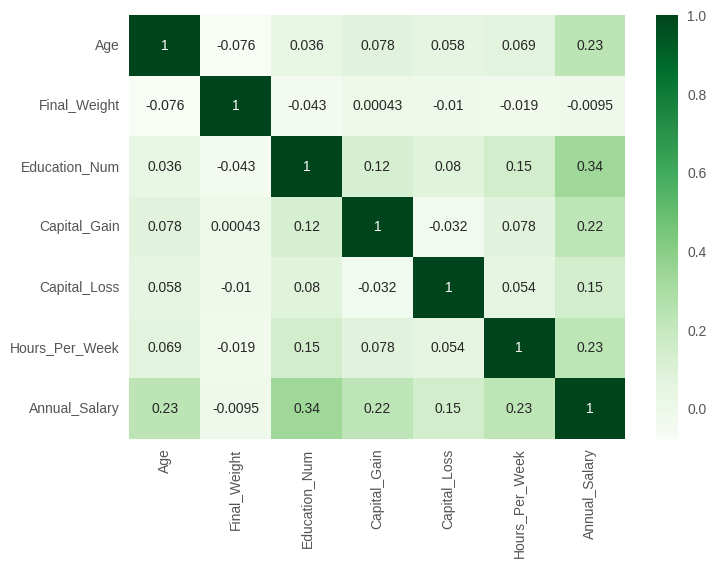

In [835]:
#View Correlations between the Various Features.
corr_df = df.corr()
Corr_matrix = sns.heatmap(corr_df,annot=True, cmap='Greens')
Corr_matrix

***Observation***

There are weak correlations of the numerical; columns to the target, however the age and and education Num havce slightly higher correlatiuons than the other columns.

In [836]:
#Visualise the Cleaned Dataframe
df['Count'] = 1
df.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Annual_Salary,Count
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,1


In [837]:
#Visualise Descriptive statisticsto identify any outliersin Numerical columns
df.describe().round(0)

#There are no Outliers in the dataset

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Annual_Salary,Count
count,32537.0,32537.0,32537.0,32537.0,32537.0,32537.0,32537.0,32537.0
mean,39.0,189781.0,10.0,1078.0,87.0,40.0,0.0,1.0
std,14.0,105556.0,3.0,7388.0,403.0,12.0,0.0,0.0
min,17.0,12285.0,1.0,0.0,0.0,1.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0,0.0,1.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0,0.0,1.0
75%,48.0,236993.0,12.0,0.0,0.0,45.0,0.0,1.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0,1.0,1.0


In [838]:
#Export a copy of the  Cleaned Dataframe
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised Machine Learning/Week 8/Assignments/Project 2/Adults_Dataset.csv', index=False)

**A Bar Chart to show the ration of Gender and the Annual Salary**

In [839]:
# Create the DataFrame
dfg = df.groupby(['Sex', 'Annual_Salary'])['Count'].sum().unstack()
dfg.reset_index(inplace=True)
dfg.columns=['Gender', 'Below_$50K', 'Above_$50K']

# Create percentages
dfg['Total_Count'] = dfg['Below_$50K'] + dfg['Above_$50K']
dfg['Below_$50K_Percentage'] = (dfg['Below_$50K'] / dfg['Total_Count']) * 100
dfg['Above_$50K_Percentage'] = (dfg['Above_$50K'] / dfg['Total_Count']) * 100
dfg['Total_Percentage'] = dfg['Total_Count'] / dfg['Total_Count'].sum() * 100
dfg.head()

,Gender,Below_$50K,Above_$50K,Total_Count,Below_$50K_Percentage,Above_$50K_Percentage,Total_Percentage
0,Female,9583,1179,10762,89.044787,10.955213,33.07619
1,Male,15115,6660,21775,69.414466,30.585534,66.92381


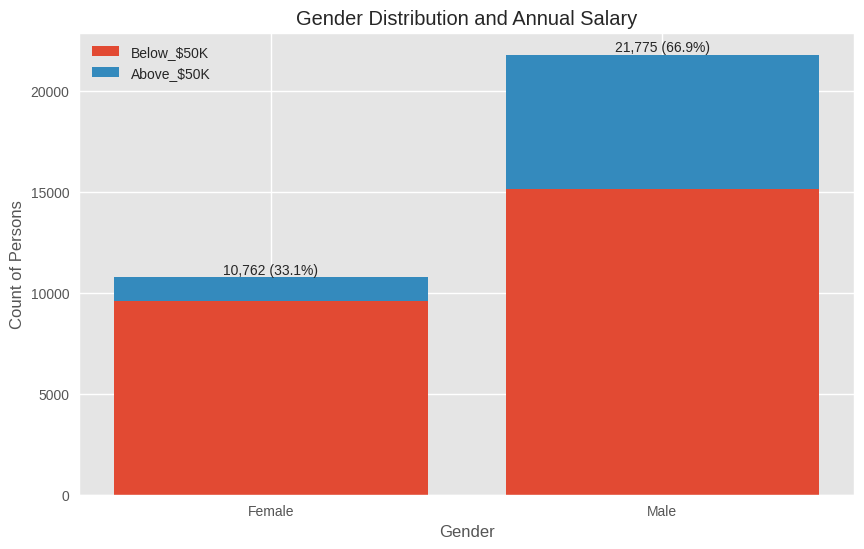

In [840]:
# Data
rows = dfg['Gender']
columns = ['Below_$50K', 'Above_$50K']
data = [dfg['Below_$50K'],dfg['Above_$50K']]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(rows, data[0], label=columns[0])
ax.bar(rows, data[1], bottom=data[0], label=columns[1])

# Add percentage annotations
totals = [i+j for i,j in zip(data[0], data[1])]
for i, total in enumerate(totals):
    percentage = f"{total:,} ({(total/sum(totals))*100:.1f}%)"
    ax.annotate(percentage, (rows[i], total), ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count of Persons')
ax.set_title('Gender Distribution and Annual Salary')
ax.legend()

plt.show()

**Observation**
```
From the stacked bar chart.
1. The data set comprises of more males (66.9%) than females(33.1%).
2. In Both the Genders, Only a very small percentage earns Above_$50K, while the biggest percentage earns Below_$50K per year
```

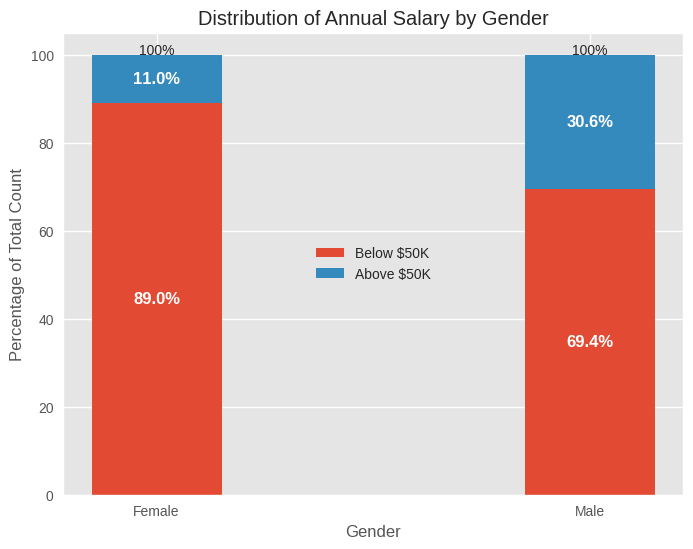

In [841]:
# Create stacked bar chart for the Percentage distributions of the Annual salary in the Gender

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(dfg['Gender'], dfg['Below_$50K_Percentage'], width=0.3, label='Below $50K')
ax.bar(dfg['Gender'], dfg['Above_$50K_Percentage'], bottom=dfg['Below_$50K_Percentage'], width=0.3, label='Above $50K')

# Add percentage annotations
for i, (row1, row2) in enumerate(zip(dfg['Below_$50K_Percentage'], dfg['Above_$50K_Percentage'])):
    total = row1 + row2
    ax.text(i, row1/2, f'{row1:.1f}%', ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    ax.text(i, row1 + row2/2, f'{row2:.1f}%', ha='center', va='center', fontsize=12, color='white', fontweight='bold')
    ax.text(i, total + 1, f'{total:.0f}%', ha='center', va='center', fontsize=10)

# Add axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of Total Count')
ax.set_title('Distribution of Annual Salary by Gender')
ax.legend(loc='center')
plt.show()

In [842]:
# Create the DataFrame
dfw = df.groupby(['Workclass', 'Annual_Salary'])['Count'].sum().unstack()
dfw.reset_index(inplace=True)
dfw.fillna(0,inplace=True)
dfw.columns=['Workclass', 'Below_$50K', 'Above_$50K']

#Add the Totals Column
dfw['Total_Count'] = dfw.iloc[:,1:3].sum(axis=1)

# Convert counts to percentages
dfw['%ge_Below_$50K'] = (dfw['Below_$50K'] / dfw['Total_Count']*100).round(2)
dfw['%age_Above_$50K'] = (dfw['Above_$50K'] / dfw['Total_Count']*100).round(2)
dfw['%age_Totals'] = ((dfw['Total_Count'] / dfw['Total_Count'].sum(axis=0))*100).round(2)

# Show the final dataframe
#dfw = dfw.iloc[:-1,:]
dfw.head(10)

,Workclass,Below_$50K,Above_$50K,Total_Count,%ge_Below_$50K,%age_Above_$50K,%age_Totals
0,Federal-gov,589.0,371.0,960.0,61.35,38.65,2.95
1,Local-gov,1476.0,617.0,2093.0,70.52,29.48,6.43
2,Never-worked,7.0,0.0,7.0,100.00,0.00,0.02
3,Private,19357.0,5152.0,24509.0,78.98,21.02,75.33
4,Self-emp-inc,494.0,622.0,1116.0,44.27,55.73,3.43
5,Self-emp-not-inc,1816.0,724.0,2540.0,71.50,28.50,7.81
6,State-gov,945.0,353.0,1298.0,72.80,27.20,3.99
7,Without-pay,14.0,0.0,14.0,100.00,0.00,0.04


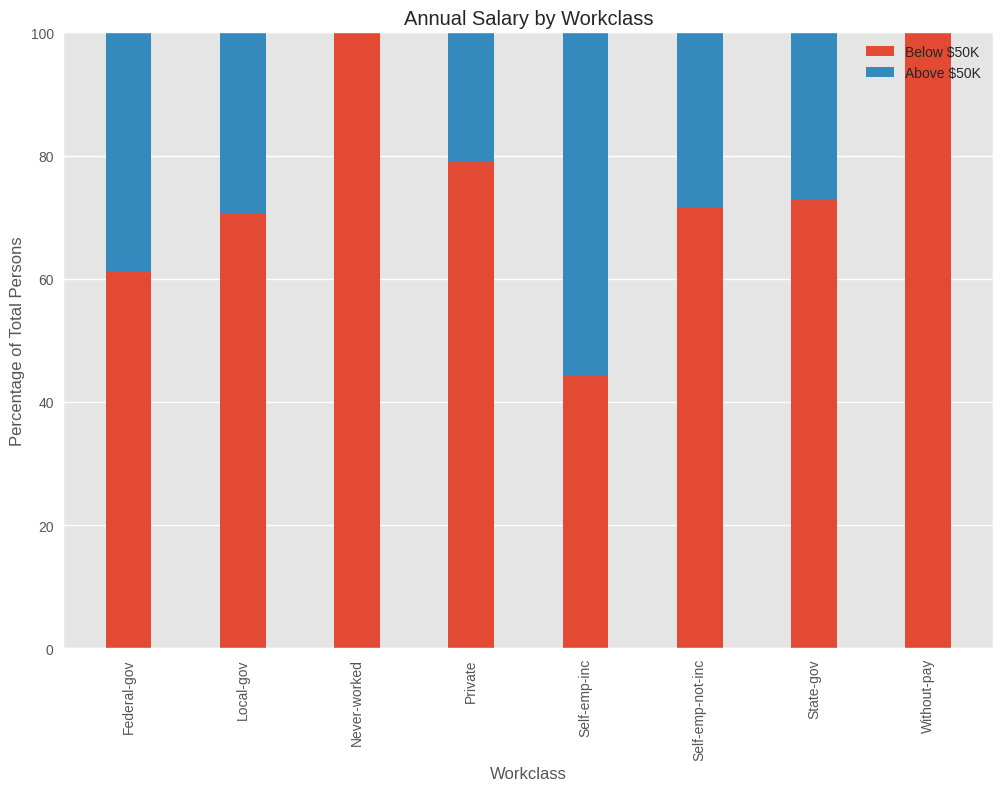

In [843]:
# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(dfw['Workclass'], dfw['%ge_Below_$50K'], label='Below $50K',width=0.4)
ax.bar(dfw['Workclass'], dfw['%age_Above_$50K'], bottom=dfw['%ge_Below_$50K'], label='Above $50K',width=0.4)

# Adding labels and legend
ax.set_xlabel('Workclass')
ax.set_ylabel('Percentage of Total Persons')
ax.set_title('Annual Salary by Workclass')
ax.set_xticklabels(list(dfw['Workclass']), rotation=90)
ax.set_xticks(range(len(dfw)))
ax.legend(loc='best')
plt.show()

**Observation**
```
1. Only persons in the Self-emp-inc Workclass are Above_$50K to  greater percentage as compared to those Below_$50K.

2. All other work classes have more persons with the annual salary Below_$50K more than those with the Annual salary Above_$50K.
```

In [844]:
# Input data
dfe = df.groupby(['Education','Annual_Salary'])['Count'].count().unstack()
dfe.fillna(0, inplace=True)
dfe.reset_index(inplace=True)
dfe.columns = ['Education', 'Below_$50K', 'Above_$50K']
dfe.head(20)

,Education,Below_$50K,Above_$50K
0,10th,871.0,62.0
1,11th,1115.0,60.0
2,12th,400.0,33.0
3,1st-4th,160.0,6.0
4,5th-6th,316.0,16.0
5,7th-8th,605.0,40.0
6,9th,487.0,27.0
7,Assoc-acdm,802.0,265.0
8,Assoc-voc,1021.0,361.0
9,Bachelors,3132.0,2221.0


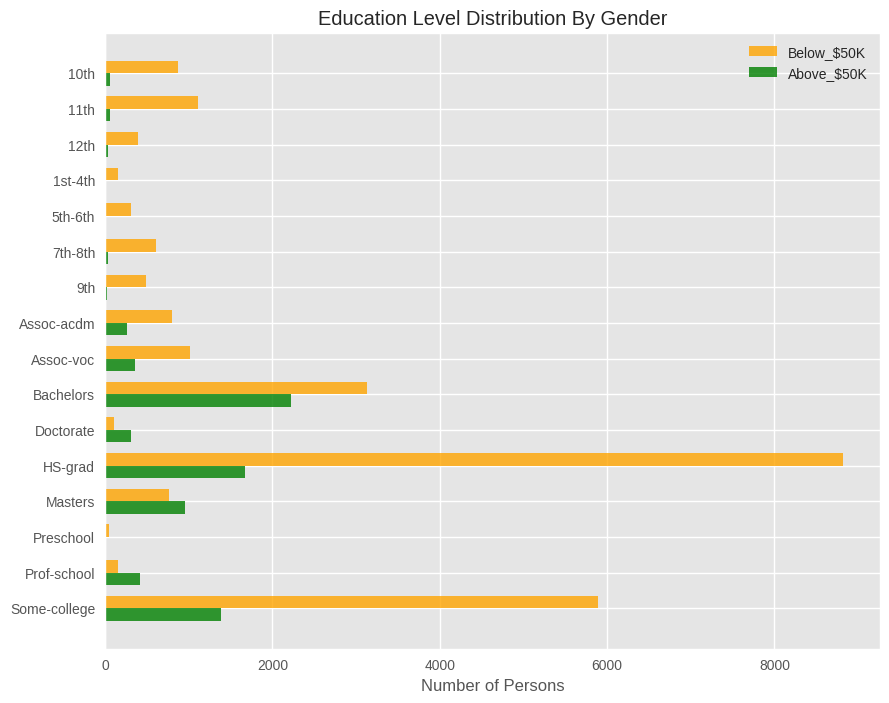

In [845]:
# Create a Horizontal bar chart
y_pos = np.arange(len(index))
Levels = dfe['Education'].values
Below_values = dfe['Below_$50K'].values
Above_values = dfe['Above_$50K'].values

# Input data
index = ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 
         'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
bar_width = 0.35
opacity = 0.8
y_pos = np.arange(len(index))

ax.barh(y_pos, Below_values, bar_width, alpha=opacity, color='orange', label='Below_$50K')
ax.barh(y_pos + bar_width, Above_values, bar_width, alpha=opacity, color='green', label='Above_$50K')

ax.set_yticks(y_pos + bar_width / 2)
ax.set_yticklabels(Levels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Persons')
ax.set_title('Education Level Distribution By Gender')
ax.legend()

plt.show()


**Observation**
```
1. All education levels have persons who are Below_$50K, however there is a greater number of persons who have their Annual Salary Above $50K in the Bachelors , HS-grad and those that have completed College.

2. The Class of Persons who have Only completed the HS-grad have the highest number of persons who earn Below_50K.
3. his is followed by those who hace Some College
```